In [15]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# type of logistic regression
### 1 - binary
### 2 - multinomial (if i have 3 label or more)
### 3 - ordinal (poor , average and excellent)

In [2]:
data = 'Social_Network_Ads.csv'

df = pd.read_csv(data)
print(df.tail())

      User ID  Gender  Age  EstimatedSalary  Purchased
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1


In [3]:
df.shape

(400, 5)

In [4]:
columns_name =df.columns
print(columns_name)

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


### get columns that is text in the dataset

In [5]:
categorial = [x for x in df.columns if df[x].dtype=='O'] # O =Object

print(categorial)

['Gender']


#### get columns that is number in dataset

In [9]:
n_categorial = [x for x in df.columns if df[x].dtype != 'O']
print(n_categorial)

['User ID', 'Age', 'EstimatedSalary', 'Purchased']


#### count how many null value in each columns

In [10]:
df[n_categorial].isnull().sum()

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# one hot-encoding

In [58]:
import category_encoders as ce
encoder =ce.BinaryEncoder(cols=df['Gender'])
 
df = encoder.fit_transform(df)


ModuleNotFoundError: No module named 'category_encoders'

In [ ]:
df[categorial].isnull().sum()
# no null in gender  

Gender    0
dtype: int64

In [ ]:
for var in categorial :
    print(df[var].value_counts()) # count the freq 

Gender
Female    204
Male      196
Name: count, dtype: int64


In [ ]:
for var in df.columns:
    print(var , len(df[var].unique()) ,"unique value")

User ID 400 unique value
Gender 2 unique value
Age 43 unique value
EstimatedSalary 117 unique value
Purchased 2 unique value


In [ ]:
# if i have date like that 12-3-2003
df['date']=df['date'].split("-")

In [ ]:


for x in df['Gender'] :
    if x == 'Female' :
        df['Gender'] =0
    else :
        df['Gender']=1
        
print(df['Gender'])

0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    1
397    1
398    1
399    1
Name: Gender, Length: 400, dtype: int64


In [ ]:


x = np.array(df[['User ID' ,'Age' ,'Gender','EstimatedSalary']])

print(x.shape)

# print(x)

y =df[['Purchased']]

print()
print(y.shape)

(400, 4)

(400, 1)


In [ ]:
x_train ,x_test ,y_train,y_test = train_test_split(x,y ,test_size=0.2 ,random_state=0)


In [ ]:
logReg =LogisticRegression(solver = 'liblinear' ,random_state=0)



In [ ]:
logReg.fit(x_train, y_train)

/home/malak/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
y_predict = logReg.predict(x_test)
print(y_predict)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1]


In [ ]:
print(y_test)

     Purchased
132          0
309          0
341          0
196          0
246          0
..         ...
14           0
363          0
304          0
361          1
329          1

[80 rows x 1 columns]


In [ ]:
# probability of getting zero 
logReg.predict_proba(x_test)[:,0]

array([0.53993042, 0.73422159, 0.61020702, 0.58641432, 0.7338289 ,
       0.85083295, 0.86173036, 0.23490162, 0.64488145, 0.76420364,
       0.73976262, 0.71498262, 0.71422423, 0.59236295, 0.5464502 ,
       0.36970203, 0.59846674, 0.55437963, 0.29802436, 0.84284391,
       0.74657307, 0.23655316, 0.73033717, 0.43516757, 0.82141325,
       0.24967274, 0.53790315, 0.57933712, 0.67528762, 0.54084897,
       0.5292859 , 0.58299268, 0.69097075, 0.71943935, 0.69804611,
       0.72760409, 0.57318031, 0.76317438, 0.80118272, 0.79179696,
       0.5355213 , 0.72559438, 0.55291985, 0.85077866, 0.39457182,
       0.69618258, 0.58260917, 0.52329016, 0.81754868, 0.54187711,
       0.34243647, 0.83165038, 0.69852302, 0.37351902, 0.53007418,
       0.81002122, 0.5637535 , 0.57500977, 0.82504018, 0.84770811,
       0.8528439 , 0.77256935, 0.60553052, 0.46890396, 0.82912478,
       0.56477781, 0.52900123, 0.69836115, 0.74645867, 0.63576192,
       0.21092941, 0.60016463, 0.66846614, 0.84175374, 0.53051

In [ ]:
# prob of getting 1 
logReg.predict_proba(x_test)[:,1]

array([0.46006958, 0.26577841, 0.38979298, 0.41358568, 0.2661711 ,
       0.14916705, 0.13826964, 0.76509838, 0.35511855, 0.23579636,
       0.26023738, 0.28501738, 0.28577577, 0.40763705, 0.4535498 ,
       0.63029797, 0.40153326, 0.44562037, 0.70197564, 0.15715609,
       0.25342693, 0.76344684, 0.26966283, 0.56483243, 0.17858675,
       0.75032726, 0.46209685, 0.42066288, 0.32471238, 0.45915103,
       0.4707141 , 0.41700732, 0.30902925, 0.28056065, 0.30195389,
       0.27239591, 0.42681969, 0.23682562, 0.19881728, 0.20820304,
       0.4644787 , 0.27440562, 0.44708015, 0.14922134, 0.60542818,
       0.30381742, 0.41739083, 0.47670984, 0.18245132, 0.45812289,
       0.65756353, 0.16834962, 0.30147698, 0.62648098, 0.46992582,
       0.18997878, 0.4362465 , 0.42499023, 0.17495982, 0.15229189,
       0.1471561 , 0.22743065, 0.39446948, 0.53109604, 0.17087522,
       0.43522219, 0.47099877, 0.30163885, 0.25354133, 0.36423808,
       0.78907059, 0.39983537, 0.33153386, 0.15824626, 0.46948

In [ ]:
from sklearn.metrics import mean_squared_error
error =mean_squared_error(y_test ,y_predict)
print(error)

0.175


## confusion matric

### true positive
### true negative
### false positive
### false positive


In [ ]:
from sklearn.metrics import confusion_matrix
cn =confusion_matrix(y_test ,y_predict)
print(cn)

print("TP" ,cn[0,0])
print("TN" ,cn[0,1])
print("FP" ,cn[1,0])
print("FN" ,cn[1,1])



[[56  2]
 [12 10]]
TP 56
TN 2
FP 12
FN 10


                  actual positive  actual negtive
predict postive                56               2
predict negative               12              10


<Axes: >

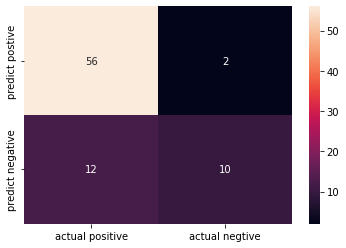

In [ ]:
cn_matrix = pd.DataFrame(data=cn , columns=['actual positive' , 'actual negtive' ] ,index=['predict postive' ,'predict negative'])
print(cn_matrix)
sns.heatmap(cn_matrix ,annot=True ,fmt='d' )

## classification report


In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test ,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        58
           1       0.83      0.45      0.59        22

    accuracy                           0.82        80
   macro avg       0.83      0.71      0.74        80
weighted avg       0.83      0.82      0.81        80

